# ¿Cuál es un mejor plan?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de los planes genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

# Análisis de Tarifas de Prepago de Megaline

__Descripción del Proyecto__

 - Analizar tarifas de prepago (Surf y Ultimate) de Megaline para determinar la más rentable
 - Datos de 500 clientes: llamadas, mensajes y uso de datos en 2018

__Estudio Inicial__

 - Examinar archivos: 
 
 `megaline_calls.csv`, `megaline_internet.csv`, `megaline_messages.csv`, `megaline_plans.csv`, `megaline_users.csv`

__Preparación de Datos__

 - Convertir datos a tipos necesarios
 - Corregir errores en datos
 - Calcular llamadas, SMS, datos e ingresos mensuales por usuario

__Análisis de Datos__

 - Describir comportamiento de clientes
 - Calcular promedio, varianza y desviación estándar
 - Crear histogramas y describir distribuciones

__Paso 4: Prueba de Hipótesis__

 - Comparar ingresos promedio entre tarifas Surf y Ultimate
 - Probar diferencias en ingresos entre usuarios de Nueva York-Nueva Jersey y otras regiones

__Paso 5: Conclusión General__

 - Interpretar resultados de pruebas y concluir sobre tarifas más rentables

# Inicialización

In [1]:
# cargar librerías

import calendar
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from IPython.display import display

## Cargar los datos

In [2]:
# cargar los archivos de datos en diferentes DataFrames

megaline_plans_df_original = pd.read_csv("./megaline_plans.csv")
megaline_users_df_original = pd.read_csv("./megaline_users.csv")
megaline_calls_df_original = pd.read_csv("./megaline_calls.csv")
megaline_messages_df_original = pd.read_csv("./megaline_messages.csv")
megaline_internet_df_original = pd.read_csv("./megaline_internet.csv")

In [3]:
# crear copias de los DataFrames originales

megaline_plans_df = megaline_plans_df_original.copy()
megaline_users_df = megaline_users_df_original.copy()
megaline_calls_df = megaline_calls_df_original.copy()
megaline_messages_df = megaline_messages_df_original.copy()
megaline_internet_df = megaline_internet_df_original.copy()

# Preparar los datos

__La tabla _plans_ `megaline_plans_df` (datos sobre las tarifas):__

 - `plan_name` — nombre de la tarifa
 - `usd_monthly_fee` — pago mensual en dólares estadounidenses
 - `minutes_included` — minutos incluidos al mes
 - `messages_included` — SMS incluidos al mes
 - `mb_per_month_included` — datos incluidos al mes (en megabytes)
 - `usd_per_minute` — precio por minuto tras exceder los límites del paquete (si el paquete incluye 100 minutos el operador cobrará el minuto 101)
 - `usd_per_message` — precio por SMS tras exceder los límites del paquete
 - `usd_per_gb` — precio por gigabyte de los datos extra tras exceder los límites del paquete (1 GB = 1024 megabytes)

__La tabla _users_ `megaline_users_df` (datos sobre los usuarios):__

 - `user_id` — identificador único del usuario
 - `first_name` — nombre del usuario
 - `last_name` — apellido del usuario
 - `age` — edad del usuario (en años)
 - `reg_date` — fecha de suscripción (dd, mm, aa)
 - `churn_date` — la fecha en que el usuario dejó de usar el servicio 
 - `city` — ciudad de residencia del usuario
 - `plan` — nombre de la tarifa

__La tabla _calls_ `megaline_calls_df` (datos sobre las llamadas):__

 - `id` — identificador único de la llamada
 - `call_date` — fecha de la llamada
 - `duration` — duración de la llamada (en minutos)
 - `user_id` — el identificador del usuario que realiza la llamada

__La tabla _messages_ `megaline_messages_df` (datos sobre los SMS):__

 - `id` — identificador único del SMS
 - `message_date` — fecha del SMS
 - `user_id` — el identificador del usuario que manda el SMS

__La tabla _internet_ `megaline_internet_df` (datos sobre las sesiones web):__

 - `id` — identificador único de la sesión
 - `mb_used` — el volumen de datos gastados durante la sesión (en megabytes)
 - `session_date` — fecha de la sesión web
 - `user_id` — identificador del usuario



## Planes

In [4]:
# mostrar la información general sobre el DataFrame de los planes

megaline_plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
# imprimir una muestra de los datos para los planes

megaline_plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


__Evaluación:__

 - Los valores del DataFrame `megaline_plans_df` describen las condiciones de los dos planes

__Plan "Surf"__

 - `messages_included`: 50 mensajes
 - `mb_per_month_included`: 15,360 MB (aproximadamente 15 GB)
 - `minutes_included`: 500 minutos
 - `usd_monthly_pay`: \$DSD20
 - `usd_per_gb`: \$10 por gigabyte extra de datos
 - `usd_per_message`: \$0.03 por mensaje SMS adicional
 - `usd_per_minute`: \$0.03 por minuto de llamada adicional
 

__Plan "Ultimate"__

 - `messages_included`: 1,000 mensajes
 - `mb_per_month_included`: 30,720 MB (aproximadamente 31 GB)
 - `minutes_included`: 3,000 minutos
 - `usd_monthly_pay`: \$70
 - `usd_per_gb`: \$7 por gigabyte extra de datos
 - `usd_per_message`: \$0.01 por mensaje SMS adicional
 - `usd_per_minute`: \$0.01 por minuto de llamada adicional

## Usuarios

In [6]:
# mostrar la información general/resumen sobre el DataFrame de los usuarios

megaline_users_df.info()
print('-'*56)
display('Resumen estádistico de los valores en la columna `age`:', megaline_users_df['age'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
--------------------------------------------------------


'Resumen estádistico de los valores en la columna `age`:'

count    500.000000
mean      45.486000
std       16.972269
min       18.000000
25%       30.000000
50%       46.000000
75%       61.000000
max       75.000000
Name: age, dtype: float64

In [7]:
# imprimir una muestra de los datos para los usuarios

megaline_users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


__Evaluacion:__

 - Hay __500__ filas en `megaline_users_df` que representan los __usuarios__ cuyos datos tenemos a disposición
 - Vamos a __convertir__ los valores en `reg_date` a datetime
 - Vamos a __convertir__ la los valores en `churn_date` a datetime, cambiando los valores ausentes en __NaT__
 - Agregamos una __nueva columna__ `active_client` que contendrá valores booleanos para indicar si un cliente está activo (__True__) o no (__False__)

In [8]:
# convertir la columna `reg_date` a datetime

megaline_users_df['reg_date'] = pd.to_datetime(megaline_users_df['reg_date'])
print('5   reg_date    500 non-null    ', megaline_users_df['reg_date'].dtypes)

5   reg_date    500 non-null     datetime64[ns]


In [9]:
# convertir la columna `churn_date` a datetime con valores no válidos como NaT 

megaline_users_df['churn_date'] = pd.to_datetime(megaline_users_df['churn_date'], errors='coerce')
print('7   churn_date  34 non-null     ', megaline_users_df['churn_date'].dtypes)
print()
display(megaline_users_df.head(10))

7   churn_date  34 non-null      datetime64[ns]



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT


In [10]:
# agregar una columna `active_client` basada en la columna `churn_date` para determinar si el cliente está activo o no

megaline_users_df['active_client'] = megaline_users_df['churn_date'].isnull()
megaline_users_df.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active_client
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,True
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,True
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,True
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,True
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,True
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaT,True
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,False
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaT,True
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaT,True
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaT,True


## Llamadas

In [11]:
# mostrar la información/resumen general sobre el DataFrame de las llamadas

print(megaline_calls_df.info())  
print('-'*62)
display('Resumen estádistico de los valores en la columna `duration`:', megaline_calls_df['duration'].describe())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None
--------------------------------------------------------------


'Resumen estádistico de los valores en la columna `duration`:'

count    137735.000000
mean          6.745927
std           5.839241
min           0.000000
25%           1.290000
50%           5.980000
75%          10.690000
max          37.600000
Name: duration, dtype: float64

In [12]:
# imprimir una muestra de datos para las llamadas

megaline_calls_df.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [13]:
# calcular el porcentaje de valores cero en la columna `duration`

zero_duration_count = megaline_calls_df[megaline_calls_df['duration']==0].shape[0]
total_rows = megaline_calls_df.shape[0]
percentage_zero_duration = (zero_duration_count / total_rows) * 100

print('Filas con valores cero en la columna `duration`:', megaline_calls_df[megaline_calls_df['duration']==0].shape[0])
print(f"Porcentaje de valores cero en la columna 'duration': {percentage_zero_duration:.2f}%")

Filas con valores cero en la columna `duration`: 26834
Porcentaje de valores cero en la columna 'duration': 19.48%


In [14]:
# mostrar el resumen estádistico sobre el DataFrame de las llamadas sin contar los valores cero

megaline_calls_df_nonzero = megaline_calls_df[megaline_calls_df['duration'] != 0]
megaline_calls_df_nonzero.describe()

,user_id,duration
count,110901.000000,110901.000000
mean,1247.511871,8.378196
std,139.475249,5.354567
min,1000.000000,0.010000
25%,1127.000000,4.150000
50%,1247.000000,7.710000
75%,1365.000000,11.820000
max,1499.000000,37.600000


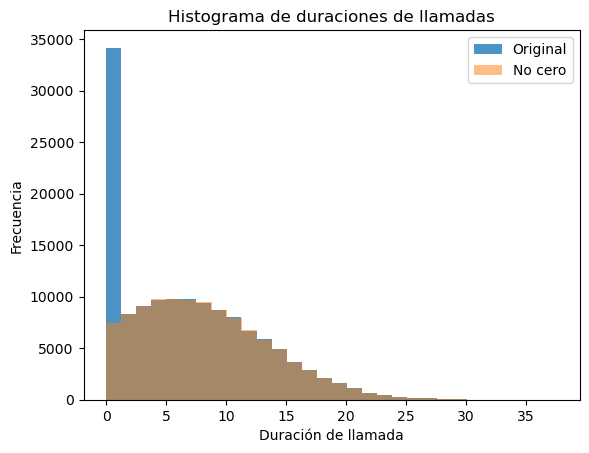

In [15]:
# mostrar la diferencia entre el DataFrame original y la versión sin valores cero en la columna `duration`

plt.hist(megaline_calls_df['duration'], bins=30, alpha=0.8, label='Original')
plt.hist(megaline_calls_df_nonzero['duration'], bins=30, alpha=0.5, label='No cero')

plt.xlabel('Duración de llamada')
plt.ylabel('Frecuencia')
plt.title('Histograma de duraciones de llamadas')
plt.legend()
plt.show()

__Evaluación:__

 - Hay __137735__ filas en `megaline_calls_df`
 - Hay __26834__ entradas con __valores cero__ en la columna `duration`
 - Estos valores representan el __19.48%__ de los datos 
 - Los valores cero se refieren a __llamadas perdidas__
 - __Agregamos una columna__ `lost_call` donde los valores son __True__ si se trata de una llamada perdida y __False__ si la duración es diferente de cero
 - Vamos a __convertir__ los valores en `call_date` a datetime
 - __Agregamos__ las columnas `month` y `year` al DataFrame
 - Vamos a mostrar __frecuencia y distribución__ de las llamadas en el tiempo

In [16]:
# convertir la columna `call_date` a datetime

megaline_calls_df['call_date'] = pd.to_datetime(megaline_calls_df['call_date'])
print('2   call_date    137735 non-null    ', megaline_calls_df['call_date'].dtypes)

2   call_date    137735 non-null     datetime64[ns]


In [17]:
# agregar una columna `lost_call` que contendrá True para llamadas perdidas y False si la duración es diferente de cero 

megaline_calls_df['lost_call'] = megaline_calls_df['duration'] == 0
megaline_calls_df['lost_call'].value_counts()

False    110901
True      26834
Name: lost_call, dtype: int64

In [18]:
# agregar columnas de mes y año

megaline_calls_df['month'] = megaline_calls_df['call_date'].dt.month
megaline_calls_df['year'] = megaline_calls_df['call_date'].dt.year
megaline_calls_df.head()

,id,user_id,call_date,duration,lost_call,month,year
0,1000_93,1000,2018-12-27,8.52,False,12,2018
1,1000_145,1000,2018-12-27,13.66,False,12,2018
2,1000_247,1000,2018-12-27,14.48,False,12,2018
3,1000_309,1000,2018-12-28,5.76,False,12,2018
4,1000_380,1000,2018-12-30,4.22,False,12,2018


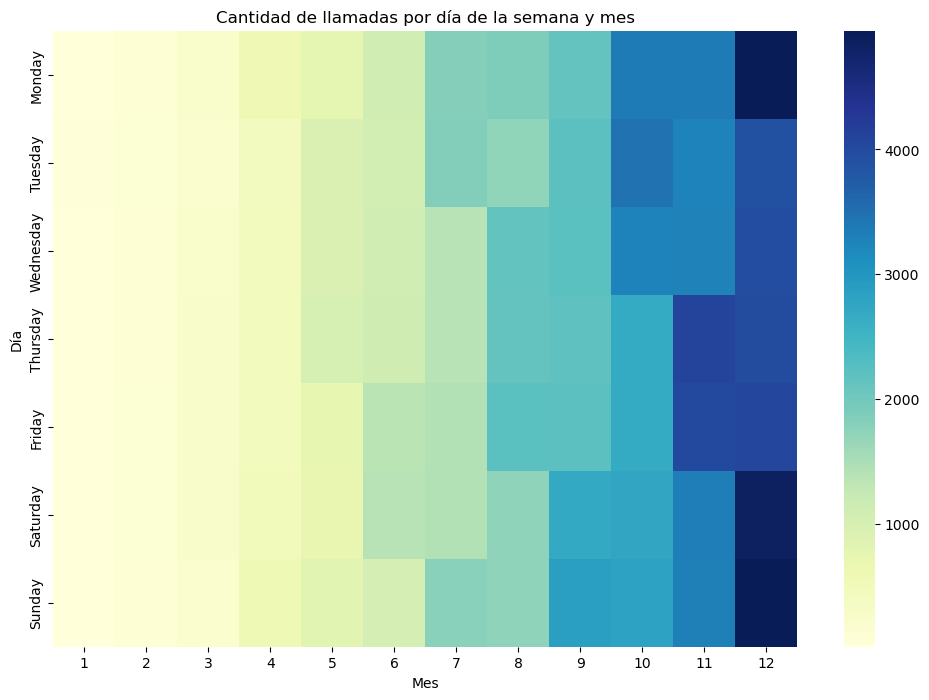

In [19]:
# mostrar frecuencia y distribución de las llamadas en el tiempo

filtered_data = megaline_calls_df

pivot_table = filtered_data.pivot_table(index=filtered_data['call_date'].dt.day_name(),
                                       columns=filtered_data['call_date'].dt.month,
                                       aggfunc='size')

pivot_table.index = pd.CategoricalIndex(pivot_table.index,
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                                        ordered=True)

pivot_table = pivot_table.sort_index()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Cantidad de llamadas por día de la semana y mes')
plt.xlabel('Mes')
plt.ylabel('Día')
plt.show()

## Mensajes

In [20]:
# mostrar la información general sobre el DataFrame de los mensajes

megaline_messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [21]:
# imprimir una muestra de datos para los mensajes

megaline_messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


__Evaluación:__

 - Encontramos __76051__ entradas en el DataFrame
 - Vamos a __convertir__ los valores en `message_date` en fechas
 - __Agregamos__ columnas de mes y año a `megaline_messages_df`
 - Vamos a mostrar __frecuencia y distribución__ de los mensajes en el tiempo

In [22]:
# convertir la columna `message_date` a datetime

megaline_messages_df['message_date'] = pd.to_datetime(megaline_messages_df['message_date'])
print('2   message_date    76051 non-null    ', megaline_messages_df['message_date'].dtypes)

2   message_date    76051 non-null     datetime64[ns]


In [23]:
# agregar columnas de mes y año a megaline_messages_df

megaline_messages_df['month'] = megaline_messages_df['message_date'].dt.month
megaline_messages_df['year'] = megaline_messages_df['message_date'].dt.year

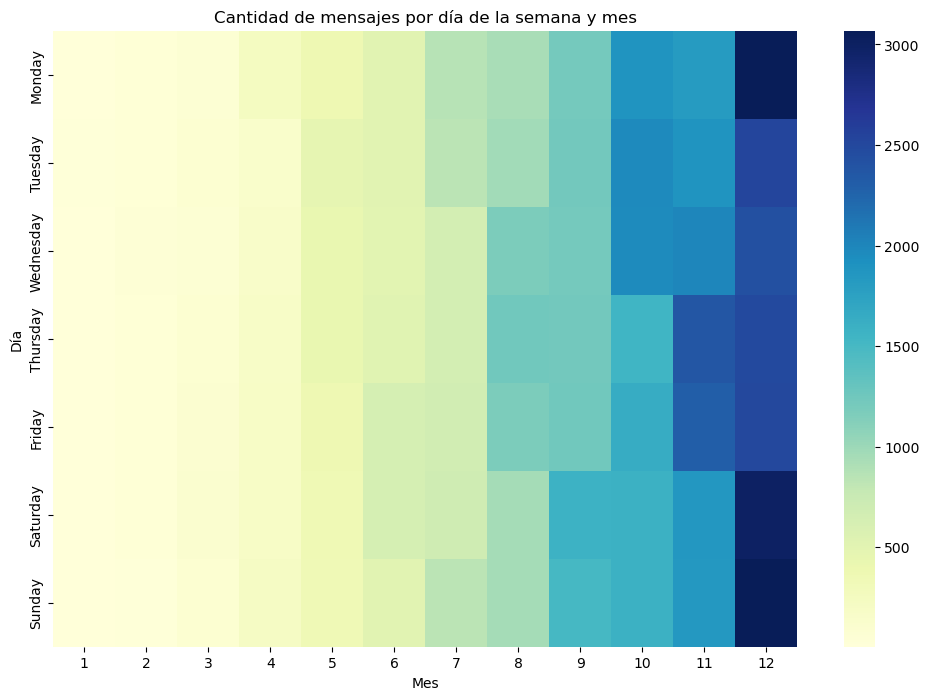

In [24]:
# mostrar frecuencia y distribución de los mensajes en el tiempo

filtered_data = megaline_messages_df
pivot_table = filtered_data.pivot_table(index=filtered_data['message_date'].dt.day_name(), 
                                       columns=filtered_data['message_date'].dt.month, 
                                       aggfunc='size')

pivot_table.index = pd.CategoricalIndex(pivot_table.index, 
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                        ordered=True)

pivot_table = pivot_table.sort_index()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Cantidad de mensajes por día de la semana y mes')
plt.xlabel('Mes')
plt.ylabel('Día')
plt.show()

## Internet

In [25]:
# mostrar la información/resumen general sobre el DataFrame de internet

megaline_internet_df.info()
print('-'*61)
display('Resumen estádistico de los valores en la columna `mb_used`:', megaline_internet_df['mb_used'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB
-------------------------------------------------------------


'Resumen estádistico de los valores en la columna `mb_used`:'

count    104825.000000
mean        366.713701
std         277.170542
min           0.000000
25%         136.080000
50%         343.980000
75%         554.610000
max        1693.470000
Name: mb_used, dtype: float64

In [26]:
# imprimir una muestra de datos para el tráfico de internet

megaline_internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


__Evaluación:__

 - Encontramos __104825__ entradas en el DataFrame
 - Vamos a __convertir__ los valores en `session_date` en fechas
 - __Agregamos__ columnas de mes y año a `megaline_internet_df`
 - Vamos a mostrar __frecuencia y distribución__ de MB consumidos en el tiempo

In [27]:
# convertir la columna `session_date` a datetime

megaline_internet_df['session_date'] = pd.to_datetime(megaline_internet_df['session_date'])
print('2   session_date    104825 non-null    ', megaline_internet_df['session_date'].dtypes)

2   session_date    104825 non-null     datetime64[ns]


In [28]:
# agregar columnas de mes y año

megaline_internet_df['month'] = megaline_internet_df['session_date'].dt.month
megaline_internet_df['year'] = megaline_internet_df['session_date'].dt.year

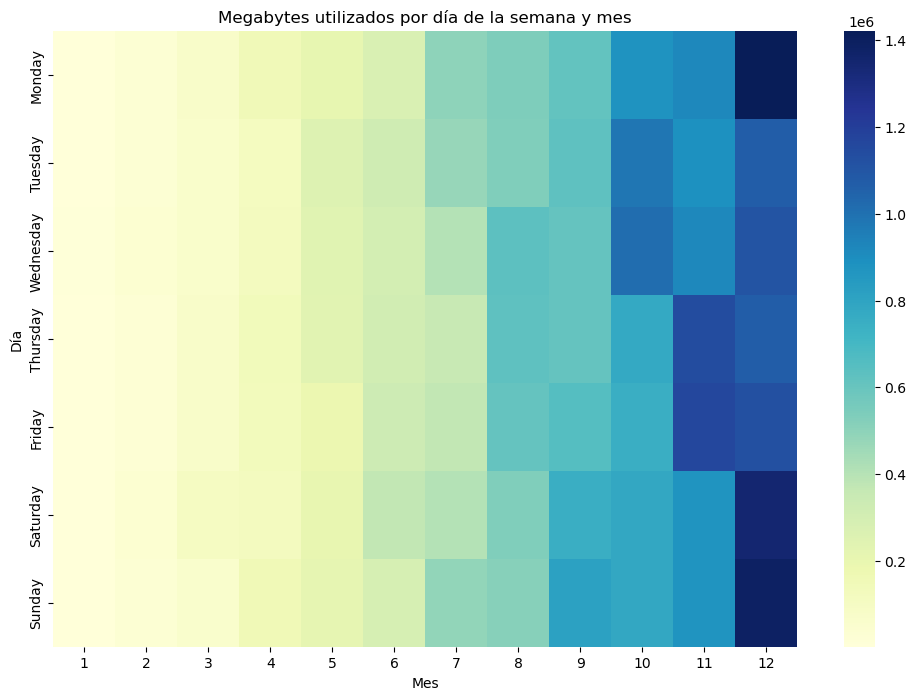

In [29]:
# mostrar frecuencia y distribución de MB consumidos en el tiempo

filtered_data = megaline_internet_df
pivot_table = filtered_data.pivot_table(index=filtered_data['session_date'].dt.day_name(), 
                                       columns=filtered_data['session_date'].dt.month, 
                                       values='mb_used', aggfunc='sum')

pivot_table.index = pd.CategoricalIndex(pivot_table.index, 
                                        categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
                                        ordered=True)

pivot_table = pivot_table.sort_index()

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Megabytes utilizados por día de la semana y mes')
plt.xlabel('Mes')
plt.ylabel('Día')
plt.show()

# Agregar datos por usuario

In [30]:
# calcular el número de llamadas hechas por cada usuario por mes

monthly_calls_per_user = megaline_calls_df.groupby(['user_id', 'month'])['id'].count().reset_index()
monthly_calls_per_user.rename(columns={'id': 'calls_made'}, inplace=True)

monthly_calls_per_user.head()

,user_id,month,calls_made
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64


In [31]:
# calcular la cantidad de minutos que usó cada usuario por mes

monthly_minutes_per_user = megaline_calls_df.groupby(['user_id','month'])['duration'].sum().reset_index()
monthly_minutes_per_user.rename(columns={'duration': 'monthly_minutes'}, inplace=True)

monthly_minutes_per_user.head()

,user_id,month,monthly_minutes
0,1000,12,116.83
1,1001,8,171.14
2,1001,9,297.69
3,1001,10,374.11
4,1001,11,404.59


In [32]:
# calcular el número de mensajes enviados por cada usuario por mes

monthly_messages_per_user = megaline_messages_df.groupby(['user_id','month'])['id'].count().reset_index()
monthly_messages_per_user.rename(columns={'id': 'messages_sent'}, inplace=True)

monthly_messages_per_user.head()

,user_id,month,messages_sent
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [33]:
# calcular el volumen del tráfico de internet usado por cada usuario por mes

monthly_mb_per_user = megaline_internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()

monthly_mb_per_user.head()

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30


In [34]:
# combinar los datos para las llamadas, minutos, mensajes e internet con base en el `user_id` y el mes

combined_data = monthly_mb_per_user.merge(monthly_messages_per_user, on=['user_id', 'month'], how='outer') 
combined_data = combined_data.merge(monthly_minutes_per_user, on=['user_id', 'month'], how='outer')
combined_data = combined_data.merge(monthly_calls_per_user, on=['user_id', 'month'], how='outer')

combined_data = combined_data.fillna(0)

combined_data

,user_id,month,mb_used,messages_sent,monthly_minutes,calls_made
0,1000,12,1901.47,11.0,116.83,16.0
1,1001,8,6919.15,30.0,171.14,27.0
2,1001,9,13314.82,44.0,297.69,49.0
3,1001,10,22330.49,53.0,374.11,65.0
4,1001,11,18504.30,36.0,404.59,64.0
...,...,...,...,...,...,...
2288,1470,12,0.00,153.0,560.44,78.0
2289,1482,10,0.00,2.0,0.00,0.0
2290,1484,11,0.00,1.0,37.50,2.0
2291,1491,4,0.00,6.0,40.45,8.0


In [35]:
# añadir la información del plan

combined_data = combined_data.merge(megaline_users_df[['user_id', 'plan']], on=['user_id'], how='outer')

combined_data = combined_data.fillna(0)

combined_data

,user_id,month,mb_used,messages_sent,monthly_minutes,calls_made,plan
0,1000,12.0,1901.47,11.0,116.83,16.0,ultimate
1,1001,8.0,6919.15,30.0,171.14,27.0,surf
2,1001,9.0,13314.82,44.0,297.69,49.0,surf
3,1001,10.0,22330.49,53.0,374.11,65.0,surf
4,1001,11.0,18504.30,36.0,404.59,64.0,surf
...,...,...,...,...,...,...,...
2298,1307,0.0,0.00,0.0,0.00,0.0,surf
2299,1319,0.0,0.00,0.0,0.00,0.0,surf
2300,1378,0.0,0.00,0.0,0.00,0.0,surf
2301,1463,0.0,0.00,0.0,0.00,0.0,ultimate


In [36]:
# calcular el ingreso mensual para cada usuario

def calculate_monthly_revenue(plan, messages_sent, mb_used, monthly_minutes):
    if plan == "surf":
        messages_included = 50
        mb_included = 15360
        minutes_included = 500
        monthly_pay = 20
        usd_per_message = 0.03
        usd_per_mb = 10 / 1024  
        usd_per_minute = 0.03
    elif plan == "ultimate":
        messages_included = 1000
        mb_included = 30720
        minutes_included = 3000
        monthly_pay = 70
        usd_per_message = 0.01
        usd_per_mb = 7 / 1024  
        usd_per_minute = 0.01
    else:
        return 0
    
    extra_messages = max(messages_sent - messages_included, 0)
    extra_mb = max(mb_used - mb_included, 0)
    extra_minutes = max(monthly_minutes - minutes_included, 0)
    
    total_usd = (
        extra_messages * usd_per_message +
        extra_mb * usd_per_mb +
        extra_minutes * usd_per_minute +
        monthly_pay
    )
    
    return total_usd

combined_data['monthly_revenue'] = combined_data.apply(
    lambda row: calculate_monthly_revenue(row['plan'], row['messages_sent'], row['mb_used'], row['monthly_minutes']),
    axis=1
)

combined_data

,user_id,month,mb_used,messages_sent,monthly_minutes,calls_made,plan,monthly_revenue
0,1000,12.0,1901.47,11.0,116.83,16.0,ultimate,70.000000
1,1001,8.0,6919.15,30.0,171.14,27.0,surf,20.000000
2,1001,9.0,13314.82,44.0,297.69,49.0,surf,20.000000
3,1001,10.0,22330.49,53.0,374.11,65.0,surf,88.161191
4,1001,11.0,18504.30,36.0,404.59,64.0,surf,50.706055
...,...,...,...,...,...,...,...,...
2298,1307,0.0,0.00,0.0,0.00,0.0,surf,20.000000
2299,1319,0.0,0.00,0.0,0.00,0.0,surf,20.000000
2300,1378,0.0,0.00,0.0,0.00,0.0,surf,20.000000
2301,1463,0.0,0.00,0.0,0.00,0.0,ultimate,70.000000


__Evaluación:__

 - Agregamos datos para mostrar el __uso del servicio__ por cada usuario
 - __Combinamos__ los datos agregados en el DataFrame `combined_data`
 - Calculamos el __ingreso mensual__ para cada usuario
 - El número de filas de estos nuevos conjuntos de datos, tiene __diferente tamaño__ según el comportamiento del usuario

# Estudia el comportamiento del usuario

## Llamadas

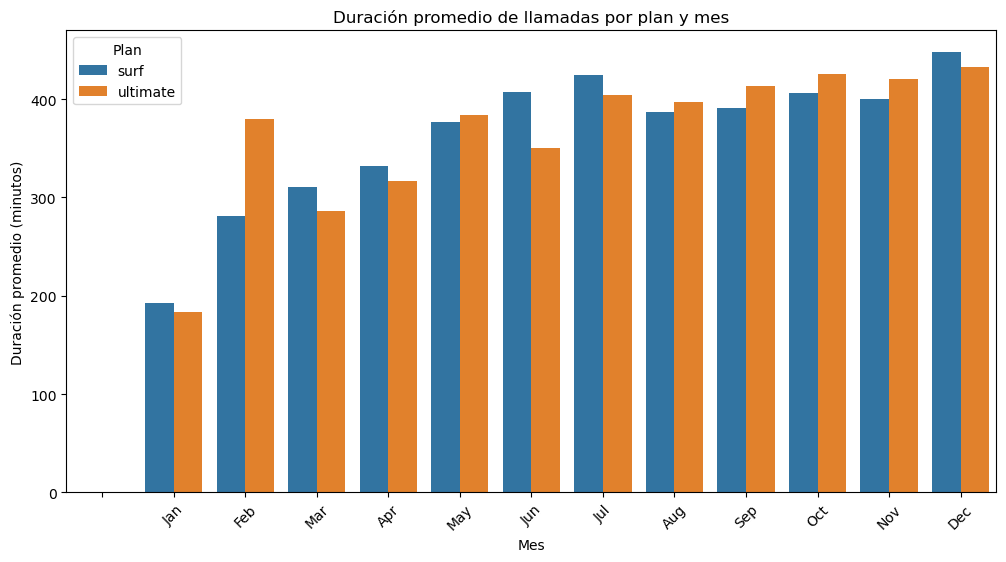

In [37]:
# trazar un gráfico de barras para comparar el promedio de la duración de la llamadas por plan y mes

average_call_duration = combined_data.groupby(['plan', 'month'])['monthly_minutes'].mean().reset_index()
average_call_duration['month'] = average_call_duration['month'].round().astype(int)
average_call_duration['month'] = average_call_duration['month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='monthly_minutes', hue='plan', data=average_call_duration)
plt.title('Duración promedio de llamadas por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Duración promedio (minutos)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

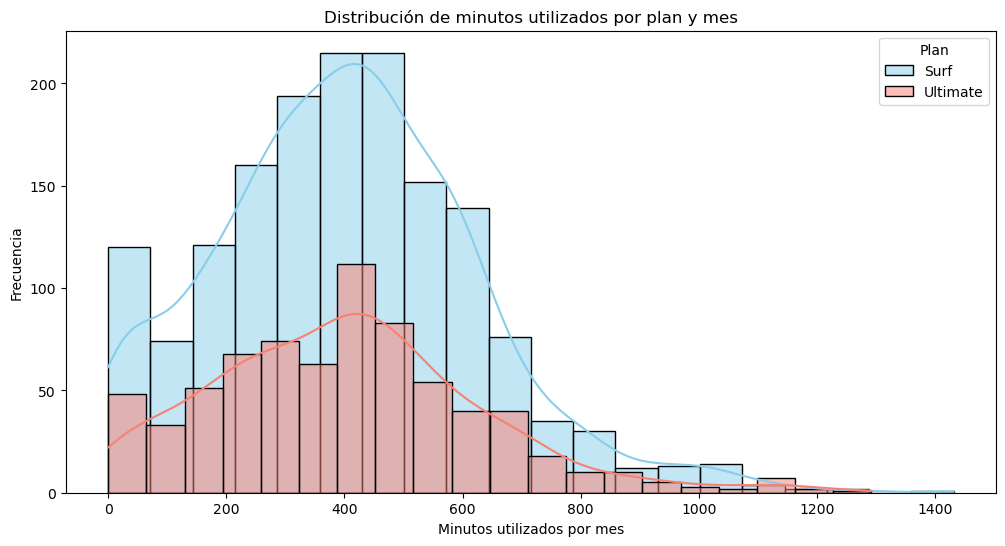

In [38]:
# trazar un histograma para comparar el número de minutos que los usuarios de cada plan requieren cada mes

surf_data = combined_data[combined_data['plan'] == 'surf']
ultimate_data = combined_data[combined_data['plan'] == 'ultimate']

plt.figure(figsize=(12, 6))
sns.histplot(data=surf_data, x='monthly_minutes', bins=20, color='skyblue', label='Surf', kde=True)
sns.histplot(data=ultimate_data, x='monthly_minutes', bins=20, color='salmon', label='Ultimate', kde=True)

plt.title('Distribución de minutos utilizados por plan y mes')
plt.xlabel('Minutos utilizados por mes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.show()

In [39]:
# calcular la media, la varianza y la desviación estándar de la duración mensual de llamadas por el plan Surf

surf_data = combined_data[combined_data['plan'] == 'surf']

media_llamadas_surf = surf_data['monthly_minutes'].mean()
varianza_llamadas_surf = surf_data['monthly_minutes'].var()
desviacion_estandar_llamadas_surf = surf_data['monthly_minutes'].std()

print(f"Media de la duración mensual de llamadas por el plan Surf: {media_llamadas_surf}")
print(f"Varianza de la duración mensual de llamadas por el plan Surf: {varianza_llamadas_surf}")
print(f"Desviación estándar de la duración mensual de llamadas por el plan Surf: {desviacion_estandar_llamadas_surf}")

Media de la duración mensual de llamadas por el plan Surf: 403.2243445218493
Varianza de la duración mensual de llamadas por el plan Surf: 49568.849927374235
Desviación estándar de la duración mensual de llamadas por el plan Surf: 222.64062955214226


In [40]:
# calcular la media, la varianza y la desviación estándar de la duración mensual de llamadas por el plan Ultimate

ultimate_data = combined_data[combined_data['plan'] == 'ultimate']

media_llamadas_ultimate = ultimate_data['monthly_minutes'].mean()
varianza_llamadas_ultimate = ultimate_data['monthly_minutes'].var()
desviacion_estandar_llamadas_ultimate = ultimate_data['monthly_minutes'].std()

print(f"Media de la duración mensual de llamadas por el plan Ultimate: {media_llamadas_ultimate}")
print(f"Varianza de la duración mensual de llamadas por el plan Ultimate: {varianza_llamadas_ultimate}")
print(f"Desviación estándar de la duración mensual de llamadas por el plan Ultimate: {desviacion_estandar_llamadas_ultimate}")

Media de la duración mensual de llamadas por el plan Ultimate: 403.94892265193363
Varianza de la duración mensual de llamadas por el plan Ultimate: 52263.0476787824
Desviación estándar de la duración mensual de llamadas por el plan Ultimate: 228.61112763551645


In [41]:
# definir una función para calcular los límites de los datos en función del IQR

def calculate_boxplot_limits(data, factor=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_limit = Q1 - factor * IQR
    upper_limit = Q3 + factor * IQR
    
    return lower_limit, upper_limit

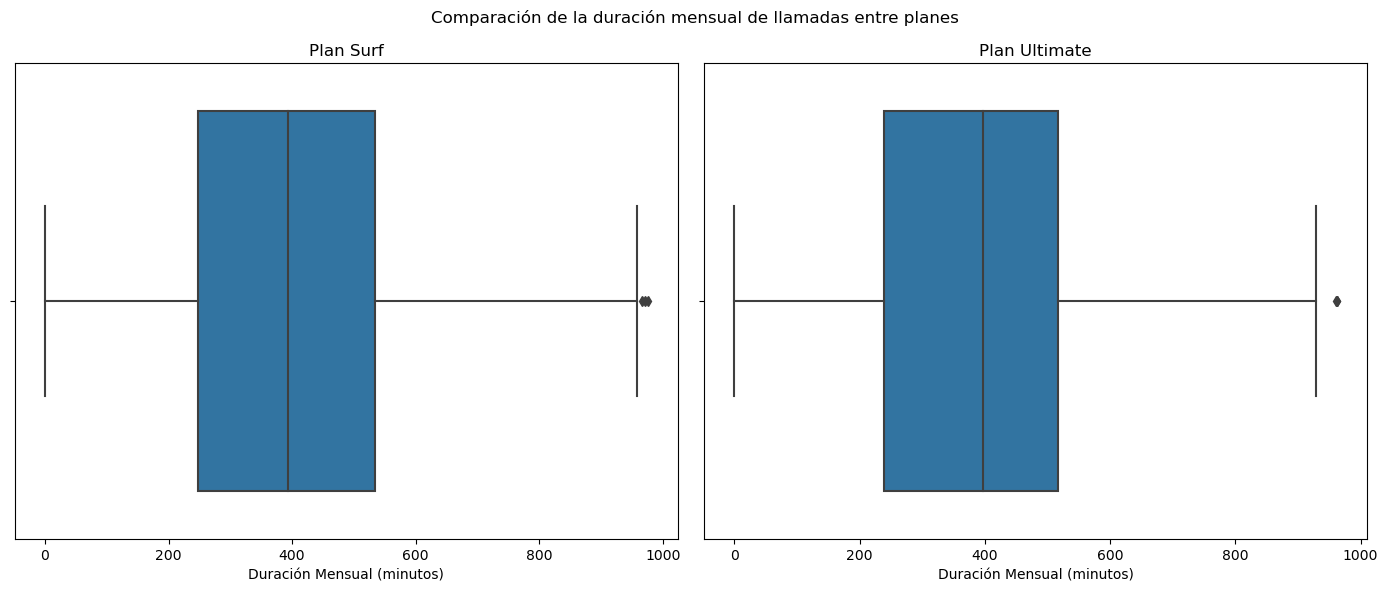

In [42]:
# comparar la duración de las llamadas por los dos planes

lower_limit, upper_limit = calculate_boxplot_limits(combined_data['monthly_minutes'])

surf_data_filtered = surf_data[(surf_data['monthly_minutes'] >= lower_limit) & (surf_data['monthly_minutes'] <= upper_limit)]
ultimate_data_filtered = ultimate_data[(ultimate_data['monthly_minutes'] >= lower_limit) & (ultimate_data['monthly_minutes'] <= upper_limit)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(data=surf_data_filtered, x='monthly_minutes', ax=axes[0])
axes[0].set_title('Plan Surf')
axes[0].set_xlabel('Duración Mensual (minutos)')

sns.boxplot(data=ultimate_data_filtered, x='monthly_minutes', ax=axes[1])
axes[1].set_title('Plan Ultimate')
axes[1].set_xlabel('Duración Mensual (minutos)')

plt.suptitle('Comparación de la duración mensual de llamadas entre planes')
plt.tight_layout()
plt.show()

__Evaluación:__

__Para el plan Surf__

 - La duración mensual __promedio__ de las llamadas es de aproximadamente __403.22 minutos__
 - La __desviación estándar__ de la duración mensual de las llamadas es de aproximadamente __222.64 minutos__

__Para el plan Ultimate__

 - La duración mensual __promedio__ de las llamadas es de aproximadamente __403.95 minutos__
 - La __desviación estándar__ de la duración mensual de las llamadas es de aproximadamente __228.61 minutos__


 - En promedio la duración de las llamadas es bastante __similar__ para ambos planes
 - El plan __Ultimate__ tiene una varianza __ligeramente mayor__ 
 - Esto podría sugerir una __mayor variabilidad__ en la duración de las llamadas entre los usuarios de ese plan

## Mensajes

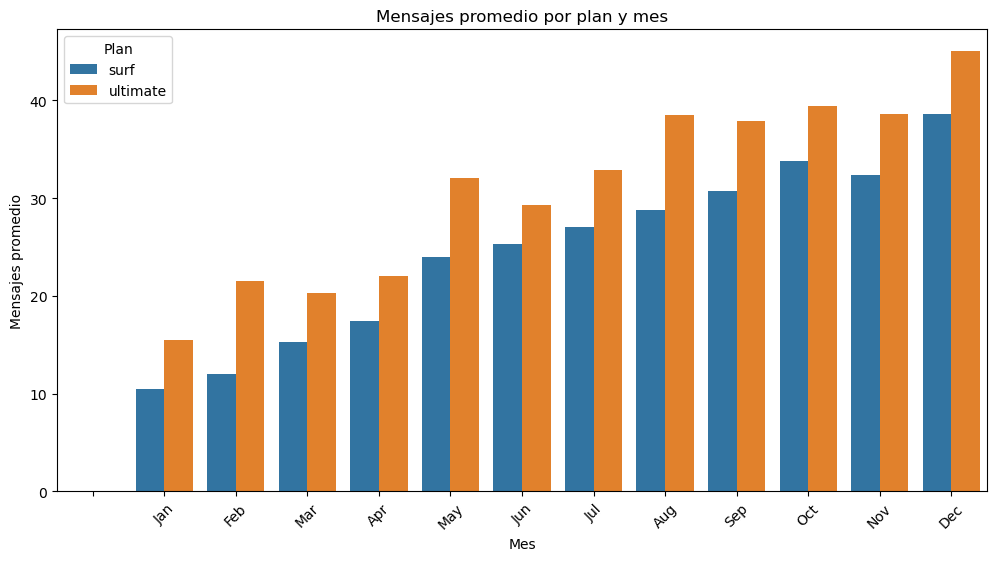

In [43]:
# trazar un gráfico de barras para comparar el número de mensajes enviados cada mes por los usuarios por cada plan

average_message_count = combined_data.groupby(['plan', 'month'])['messages_sent'].mean().reset_index()
average_message_count['month'] = average_message_count['month'].round().astype(int)
average_message_count['month'] = average_message_count['month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='messages_sent', hue='plan', data=average_message_count)
plt.title('Mensajes promedio por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Mensajes promedio')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

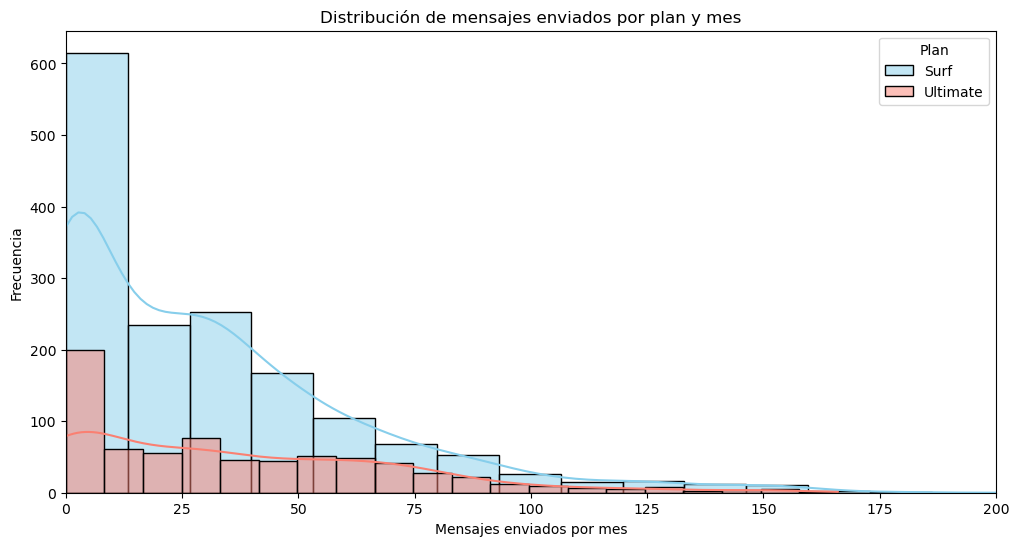

In [44]:
# trazar un histograma para comparar el número de mensajes que los usuarios de cada plan requieren cada mes

surf_data = combined_data[combined_data['plan'] == 'surf']
ultimate_data = combined_data[combined_data['plan'] == 'ultimate']

plt.figure(figsize=(12, 6))
sns.histplot(data=surf_data, x='messages_sent', bins=20, color='skyblue', label='Surf', kde=True)
sns.histplot(data=ultimate_data, x='messages_sent', bins=20, color='salmon', label='Ultimate', kde=True)

plt.title('Distribución de mensajes enviados por plan y mes')
plt.xlabel('Mensajes enviados por mes')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.xlim(0, 200)
plt.show()

In [45]:
# calcular la media, la varianza y la desviación estándar de mensajes enviados por el plan Surf

surf_data = combined_data[combined_data['plan'] == 'surf']

media_mensajes_surf = surf_data['messages_sent'].mean()
varianza_mensajes_surf = surf_data['messages_sent'].var()
desviacion_estandar_mensajes_surf = surf_data['messages_sent'].std()

print(f"Media de mensajes enviados cada mes por el plan Surf: {media_mensajes_surf}")
print(f"Varianza de mensajes enviados cada mes por el plan Surf: {varianza_mensajes_surf}")
print(f"Desviación estándar de mensajes enviados cada mes por el plan Surf: {desviacion_estandar_mensajes_surf}")

Media de mensajes enviados cada mes por el plan Surf: 31.041165294490185
Varianza de mensajes enviados cada mes por el plan Surf: 1126.1180762077647
Desviación estándar de mensajes enviados cada mes por el plan Surf: 33.55768281940463


In [46]:
# calcular la media, la varianza y la desviación estándar de mensajes enviados por el plan Ultimate

ultimate_data = combined_data[combined_data['plan'] == 'ultimate']

media_mensajes_ultimate = ultimate_data['messages_sent'].mean()
varianza_mensajes_ultimate = ultimate_data['messages_sent'].var()
desviacion_estandar_mensajes_ultimate = ultimate_data['messages_sent'].std()

print(f"Media de mensajes enviados cada mes por el plan Ultimate: {media_mensajes_ultimate}")
print(f"Varianza de mensajes enviados cada mes por el plan Ultimate: {varianza_mensajes_ultimate}")
print(f"Desviación estándar de mensajes enviados cada mes por el plan Ultimate: {desviacion_estandar_mensajes_ultimate}")

Media de mensajes enviados cada mes por el plan Ultimate: 37.3439226519337
Varianza de mensajes enviados cada mes por el plan Ultimate: 1209.8276117007813
Desviación estándar de mensajes enviados cada mes por el plan Ultimate: 34.7825762660097


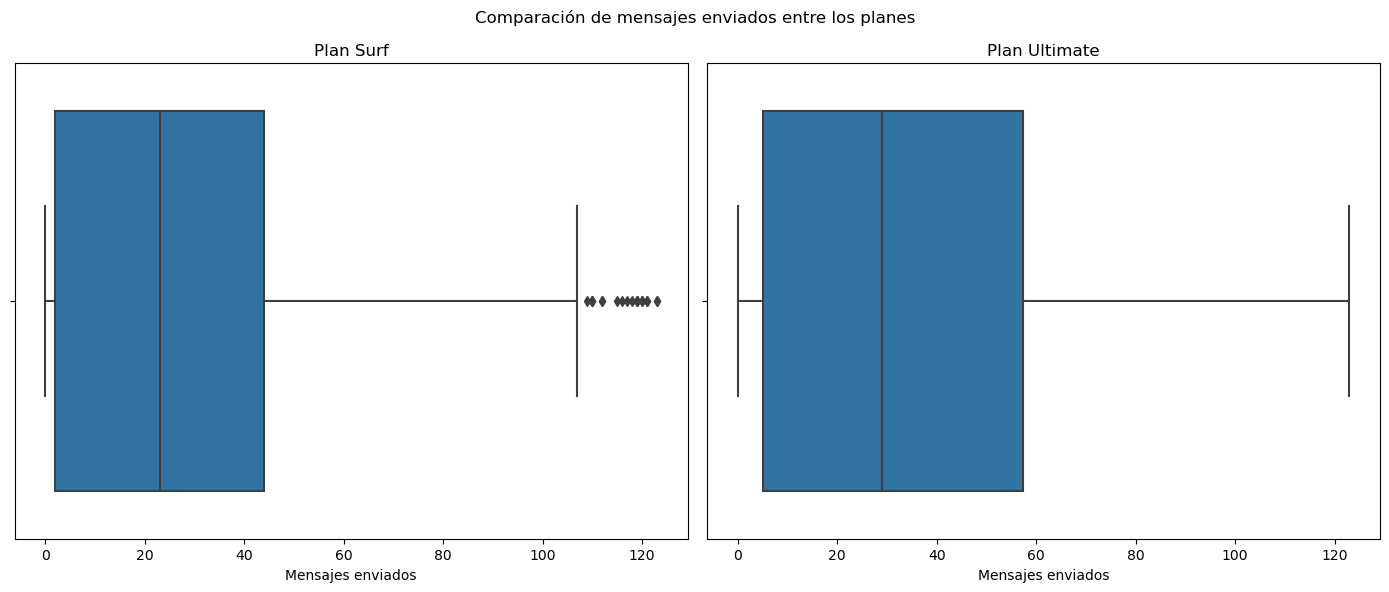

In [47]:
# comparar los mensajes enviados por los dos planes

lower_limit, upper_limit = calculate_boxplot_limits(combined_data['messages_sent'])

surf_data_filtered = surf_data[(surf_data['messages_sent'] >= lower_limit) & (surf_data['messages_sent'] <= upper_limit)]
ultimate_data_filtered = ultimate_data[(ultimate_data['messages_sent'] >= lower_limit) & (ultimate_data['messages_sent'] <= upper_limit)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(data=surf_data_filtered, x='messages_sent', ax=axes[0])
axes[0].set_title('Plan Surf')
axes[0].set_xlabel('Mensajes enviados')

sns.boxplot(data=ultimate_data_filtered, x='messages_sent', ax=axes[1])
axes[1].set_title('Plan Ultimate')
axes[1].set_xlabel('Mensajes enviados')

plt.suptitle('Comparación de mensajes enviados entre los planes')
plt.tight_layout()
plt.show()

__Evaluación:__

__Para el plan Surf__

- La cantidad de mensajes enviados __promedio__ cada mes es de aproximadamente __31 mensajes__
- La __desviación estándar__ de la cantidad de mensajes enviados cada mes es de aproximadamente __33 mensajes__

__Para el plan Ultimate__

- La cantidad de mensajes enviados __promedio__ cada mes es de aproximadamente __37 mensajes__
- La __desviación estándar__ de la cantidad de mensajes enviados cada mes es de aproximadamente __34 mensajes__


- En __promedio__, los usuarios del plan Ultimate envían __más mensajes__ cada mes en comparación con los usuarios del plan Surf
- El plan Ultimate muestra una __mayor variabilidad__ en la cantidad de mensajes enviados

## Internet

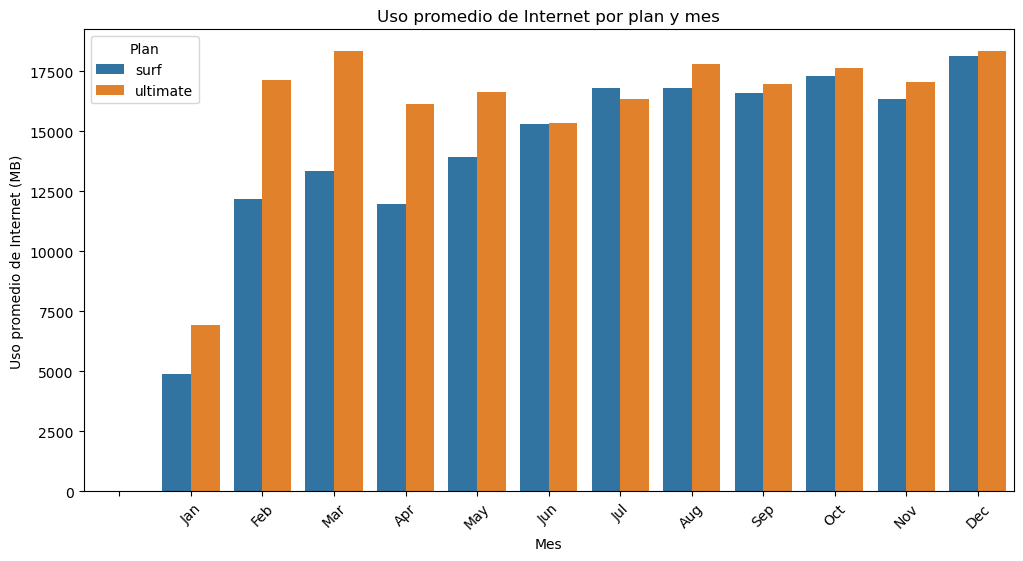

In [48]:
# trazar un gráfico de barras para comparar la cantidad de MB consumidos cada mes por los usuarios por cada plan

average_internet_usage = combined_data.groupby(['plan', 'month'])['mb_used'].mean().reset_index()
average_internet_usage['month'] = average_internet_usage['month'].round().astype(int)
average_internet_usage['month'] = average_internet_usage['month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='mb_used', hue='plan', data=average_internet_usage)
plt.title('Uso promedio de Internet por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Uso promedio de Internet (MB)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

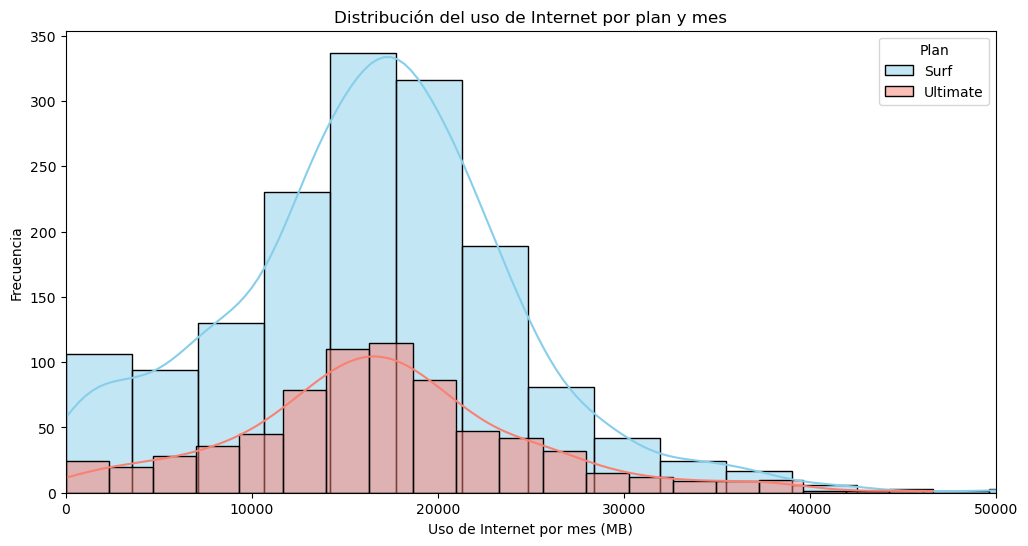

In [49]:
# trazar un histograma para comparar la cantidad de MB que los usuarios de cada plan requieren cada mes

surf_data = combined_data[combined_data['plan'] == 'surf']
ultimate_data = combined_data[combined_data['plan'] == 'ultimate']

plt.figure(figsize=(12, 6))
sns.histplot(data=surf_data, x='mb_used', bins=20, color='skyblue', label='Surf', kde=True)
sns.histplot(data=ultimate_data, x='mb_used', bins=20, color='salmon', label='Ultimate', kde=True)

plt.title('Distribución del uso de Internet por plan y mes')
plt.xlabel('Uso de Internet por mes (MB)')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.xlim(0, 50000) 
plt.show()

In [50]:
# calcular la media, la varianza y la desviación estándar de MB consumidos por el plan Surf

surf_data = combined_data[combined_data['plan'] == 'surf']

media_mb_surf = surf_data['mb_used'].mean()
varianza_mb_surf = surf_data['mb_used'].var()
desviacion_estandar_mb_surf = surf_data['mb_used'].std()

print(f"Media de MB consumidos cada mes por el plan Surf: {media_mb_surf}")
print(f"Varianza de MB consumidos cada mes por el plan Surf: {varianza_mb_surf}")
print(f"Desviación estándar de MB consumidos cada mes por el plan Surf: {desviacion_estandar_mb_surf}")

Media de MB consumidos cada mes por el plan Surf: 16495.364110196326
Varianza de MB consumidos cada mes por el plan Surf: 65010762.831837304
Desviación estándar de MB consumidos cada mes por el plan Surf: 8062.925203165245


In [51]:
# calcular la media, la varianza y la desviación estándar de MB consumidos por el plan Ultimate

ultimate_data = combined_data[combined_data['plan'] == 'ultimate']

media_mb_ultimate = ultimate_data['mb_used'].mean()
varianza_mb_ultimate = ultimate_data['mb_used'].var()
desviacion_estandar_mb_ultimate = ultimate_data['mb_used'].std()

print(f"Media de MB consumidos cada mes por el plan Ultimate: {media_mb_ultimate}")
print(f"Varianza de MB consumidos cada mes por el plan Ultimate: {varianza_mb_ultimate}")
print(f"Desviación estándar de MB consumidos cada mes por el plan Ultimate: {desviacion_estandar_mb_ultimate}")

Media de MB consumidos cada mes por el plan Ultimate: 17119.59085635359
Varianza de MB consumidos cada mes por el plan Ultimate: 62941678.2320742
Desviación estándar de MB consumidos cada mes por el plan Ultimate: 7933.579156476237


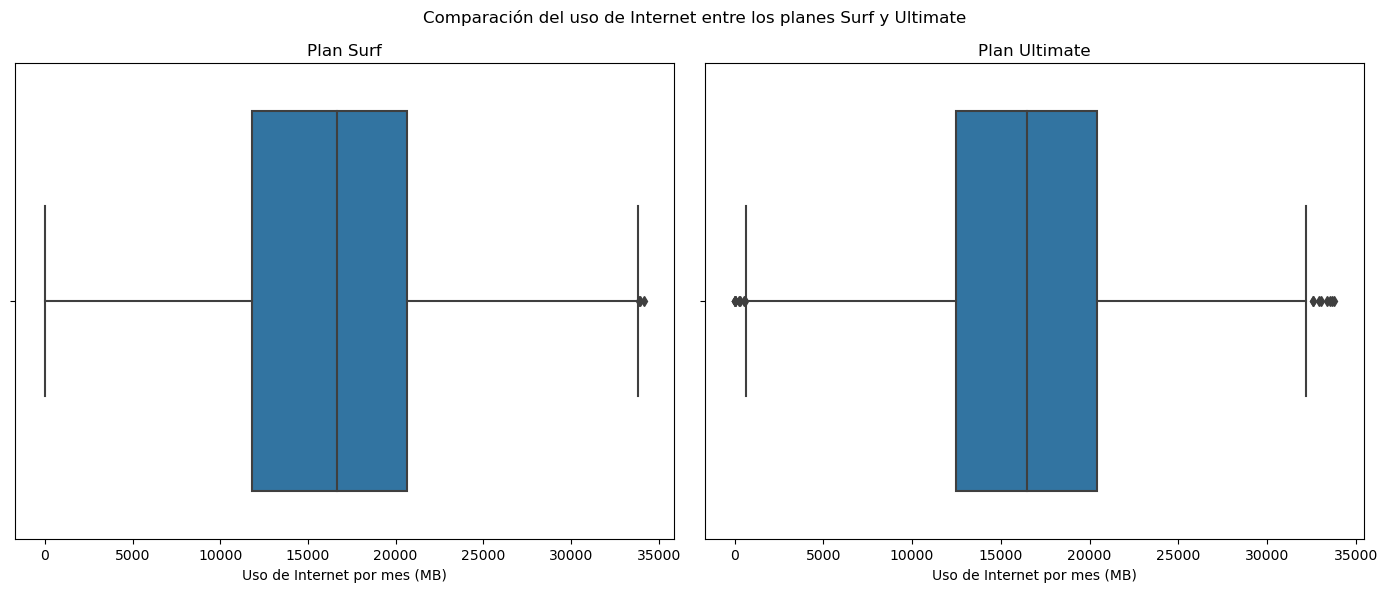

In [52]:
# comparar los MB consumidos por los dos planes

lower_limit, upper_limit = calculate_boxplot_limits(combined_data['mb_used'])

surf_data_filtered = surf_data[(surf_data['mb_used'] >= lower_limit) & (surf_data['mb_used'] <= upper_limit)]
ultimate_data_filtered = ultimate_data[(ultimate_data['mb_used'] >= lower_limit) & (ultimate_data['mb_used'] <= upper_limit)]

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

sns.boxplot(data=surf_data_filtered, x='mb_used', ax=axes[0])
axes[0].set_title('Plan Surf')
axes[0].set_xlabel('Uso de Internet por mes (MB)')

sns.boxplot(data=ultimate_data_filtered, x='mb_used', ax=axes[1])
axes[1].set_title('Plan Ultimate')
axes[1].set_xlabel('Uso de Internet por mes (MB)')

plt.suptitle('Comparación del uso de Internet entre los planes Surf y Ultimate')
plt.tight_layout()
plt.show()

__Evaluación:__

__Para el plan Surf__

- La cantidad de MB consumidos __promedio__ cada mes es de aproximadamente __16,49 MB__
- La __desviación estándar__ de la cantidad de MB consumidos cada mes por el plan "Surf" es de aproximadamente __8,06 MB__

__Para el plan Ultimate__

- La cantidad de MB consumidos __promedio__ cada mes es de aproximadamente __17,11 MB__
- La __desviación estándar__ de la cantidad de MB consumidos cada mes por el plan "Ultimate" es de aproximadamente __7,93 MB__


- En promedio los usuarios del plan Ultimate consumen __ligeramente más__ MB cada mes
- La varianza y la desviación estándar de la cantidad de MB consumidos son __bastante similares__ entre ambos planes
- Esto sugiere una __consistencia__ en el uso de datos en ambos planes

## Ingreso

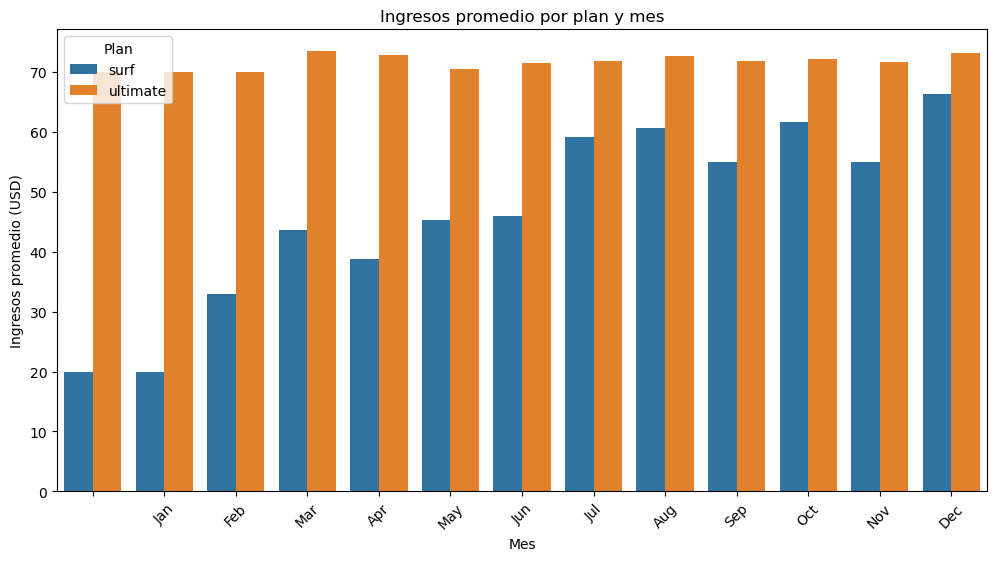

In [53]:
# trazar un gráfico de barras para comparar los ingresos mensuales de los usuarios por cada plan

average_revenue_usage = combined_data.groupby(['plan', 'month'])['monthly_revenue'].mean().reset_index()
average_revenue_usage['month'] = average_revenue_usage['month'].round().astype(int)
average_revenue_usage['month'] = average_revenue_usage['month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='monthly_revenue', hue='plan', data=average_revenue_usage)
plt.title('Ingresos promedio por plan y mes')
plt.xlabel('Mes')
plt.ylabel('Ingresos promedio (USD)')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.show()

In [54]:
# calcular la media, la varianza y la desviación estándar de ingresos por el plan Surf

surf_data = combined_data[combined_data['plan'] == 'surf']

media_ingresos_surf = surf_data['monthly_revenue'].mean()
varianza_ingresos_surf = surf_data['monthly_revenue'].var()
desviacion_estandar_ingresos_surf = surf_data['monthly_revenue'].std()

print(f"Media de ingresos cada mes por el plan Surf: {media_ingresos_surf}")
print(f"Varianza de ingresos cada mes por el plan Surf: {varianza_ingresos_surf}")
print(f"Desviación estándar de ingresos cada mes por el plan Surf: {desviacion_estandar_ingresos_surf}")

Media de ingresos cada mes por el plan Surf: 57.152072411831064
Varianza de ingresos cada mes por el plan Surf: 2881.833930716778
Desviación estándar de ingresos cada mes por el plan Surf: 53.682715381366265


In [55]:
# calcular la media, la varianza y la desviación estándar de ingresos por el plan Ultimate

ultimate_data = combined_data[combined_data['plan'] == 'ultimate']

media_ingresos_ultimate = ultimate_data['monthly_revenue'].mean()
varianza_ingresos_ultimate = ultimate_data['monthly_revenue'].var()
desviacion_ingresos_ultimate = ultimate_data['monthly_revenue'].std()

print(f"Media de ingresos cada mes por el plan Ultimate: {media_ingresos_ultimate}")
print(f"Varianza de ingresos cada mes por el plan Ultimate: {varianza_ingresos_ultimate}")
print(f"Desviación estándar de ingresos cada mes por el plan Ultimate: {desviacion_ingresos_ultimate}")

Media de ingresos cada mes por el plan Ultimate: 72.10438859633979
Varianza de ingresos cada mes por el plan Ultimate: 115.35112331125356
Desviación estándar de ingresos cada mes por el plan Ultimate: 10.740164026273229


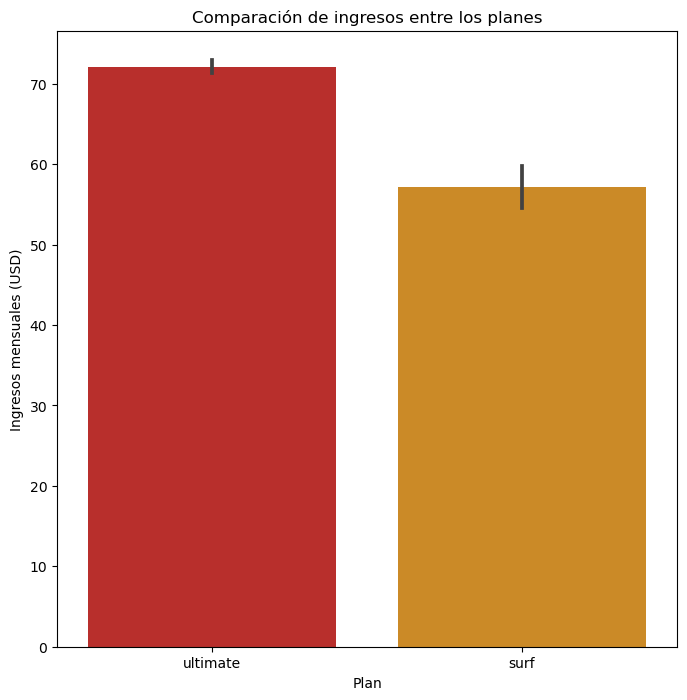

In [56]:
# comparar los ingresos por los usuarios por plan y mes

custom_palette = {'surf': '#E7900B', 'ultimate': '#CF1815'}

plt.figure(figsize=(8, 8))
sns.barplot(data=combined_data, x='plan', y='monthly_revenue', errorbar=('ci', 95), palette=custom_palette)
plt.title('Comparación de ingresos entre los planes')
plt.xlabel('Plan')
plt.ylabel('Ingresos mensuales (USD)')
plt.show()

__Evaluación:__

__Para el plan Surf__

- La __media__ de ingresos cada mes es de aproximadamente __\$57.15__
- La __desviación estándar__ de ingresos cada mes es de aproximadamente __\$53.68__

__Para el plan Ultimate__

- La __media__ de ingresos cada mes es de aproximadamente __\$72.10__
- La __desviación estándar__ de ingresos cada mes es de aproximadamente __\$10.74__


- Se observa que el plan Ultimate genera ingresos mensuales __significativamente mayores__ en promedio que el plan Surf
- La  varianza y la desviación estándar de los ingresos mensuales del plan Ultimate son __considerablemente más bajas__ en comparación con el plan Surf
- Esto sugiere que el plan Ultimate tiene una __mayor consistencia__ en sus ingresos mensuales en comparación con el plan Surf

# Probar las hipótesis estadísticas

In [57]:
# crear arreglos NumPy a partir de las columnas de ingresos mensuales de los usuarios de cada plan

ingresos_surf = combined_data[combined_data['plan'] == 'surf']['monthly_revenue'].values
ingresos_ultimate = combined_data[combined_data['plan'] == 'ultimate']['monthly_revenue'].values

arreglo_ingresos_surf = np.array(ingresos_surf)
arreglo_ingresos_ultimate = np.array(ingresos_ultimate)

In [58]:
# probar las hipótesis

t_statistic, p_value = stats.ttest_ind(ingresos_surf, ingresos_ultimate)

alpha = 0.05

if p_value < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

print(f'Valor de t: {t_statistic}')
print(f'Valor p: {p_value}')

Rechazamos la hipótesis nula
Valor de t: -7.425845700402007
Valor p: 1.5695898114080992e-13


In [59]:
# agregamos la región de los usuarios a `combined_data`

combined_data = combined_data.merge(megaline_users_df[['user_id', 'city']], on=['user_id'], how='outer')

combined_data = combined_data.fillna(0)

combined_data.head()

,user_id,month,mb_used,messages_sent,monthly_minutes,calls_made,plan,monthly_revenue,city
0,1000,12.0,1901.47,11.0,116.83,16.0,ultimate,70.000000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8.0,6919.15,30.0,171.14,27.0,surf,20.000000,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9.0,13314.82,44.0,297.69,49.0,surf,20.000000,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10.0,22330.49,53.0,374.11,65.0,surf,88.161191,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11.0,18504.30,36.0,404.59,64.0,surf,50.706055,"Seattle-Tacoma-Bellevue, WA MSA"


In [60]:
# probar las hipótesis

ny_nj_income = combined_data[combined_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']
other_regions_income = combined_data[combined_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA']['monthly_revenue']

alpha = 0.05
results = stats.ttest_ind(ny_nj_income, other_regions_income, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value: 0.021731939597751316
Rechazamos la hipótesis nula


# Conclusión general

__Resultados del Análisis de Prueba t para los Planes Surf y Ultimate:__

- Hemos realizado una __prueba t__ de dos muestras para comparar los ingresos mensuales promedio entre los usuarios de los planes Surf y Ultimate
- El objetivo era determinar si existen diferencias significativas en los ingresos entre estos dos grupos de usuarios

__Los resultados de la prueba indican lo siguiente:__

Valor de t: El valor de t calculado es de aproximadamente __-7.43__

Valor p: El valor p calculado es extremadamente pequeño, alrededor de __1.57e-13__

__Interpretación:__

Dado que el __valor p__ es significativamente menor que nuestro nivel de significancia (alfa) establecido en 0.05, podemos concluir que hay evidencia suficiente para __rechazar la hipótesis nula__. En otras palabras, los ingresos mensuales promedio de los usuarios de los planes Surf y Ultimate son __significativamente diferentes__. Este resultado sugiere que existe una diferencia significativa en los ingresos entre los dos grupos de usuarios. Específicamente, los usuarios del plan Ultimate tienden a generar ingresos mensuales promedio __significativamente más altos__ en comparación con los usuarios del plan Surf.

__Resultados de la Prueba de Hipótesis para Ingresos Mensuales en el Área "New York-Newark-Jersey City, NY-NJ-PA MSA":__

- Hemos realizado una prueba de hipótesis para comparar los ingresos mensuales promedio entre los usuarios del área "New York-Newark-Jersey City, NY-NJ-PA MSA" y los usuarios de otras regiones

__Nuestras hipótesis eran las siguientes:__

- Hipótesis Nula (H0): No hay diferencia significativa en los ingresos mensuales promedio entre los usuarios del área "New York-Newark-Jersey City, NY-NJ-PA MSA" y los usuarios de otras regiones


- Hipótesis Alternativa (H1): Existe una diferencia significativa en los ingresos mensuales promedio entre los usuarios del área "New York-Newark-Jersey City, NY-NJ-PA MSA" y los usuarios de otras regiones

__Los resultados de la prueba son los siguientes:__

Valor p: El valor p calculado es aproximadamente __0.022__

__Interpretación:__

Dado que el __valor p__ es menor que nuestro nivel de significancia (alfa) establecido en 0.05, tenemos evidencia suficiente para __rechazar la hipótesis nula__. Esto significa que hay una __diferencia significativa__ en los ingresos mensuales promedio entre los usuarios del área "New York-Newark-Jersey City, NY-NJ-PA MSA" y los usuarios de otras regiones. En resumen, nuestros hallazgos respaldan la hipótesis alternativa, lo que sugiere que los ingresos mensuales promedio de los usuarios en el área "New York-Newark-Jersey City, NY-NJ-PA MSA" son __significativamente diferentes__ de los usuarios en otras regiones.